In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Analyze of Public Health data to analyze the People Health Condition based on Heart Rate and Oxygen Saturation

In [5]:
# Loading the data
public_health_data = pd.read_csv("Dataset\Rural_public_service_dataset.csv")
public_health_data.head()

,Region,Date,Oil Moisture,Blood Pressure,Heart Rate,Oxygen Saturation,Telemedicine Consultations,AQI,Water Levels,Temperature,Agriculture Target,Healthcare Target,Environmental Target
0,Tamil Nadu,2024-01-01,18.981774,142.979403,62.923262,97.661459,8,161.757324,4.302414,19.475568,1,1,1
1,Kerala,2024-01-02,13.476998,104.325060,84.893731,95.516325,7,76.528030,1.240033,33.650722,1,0,0
2,Uttar Pradesh,2024-01-03,15.449762,104.275404,99.247113,95.862619,5,230.362909,2.504918,24.762089,1,1,1
3,Kerala,2024-01-04,18.837491,100.726509,67.604306,97.839871,2,225.538376,4.702332,27.608962,1,0,1
4,Kerala,2024-01-05,15.608580,157.390084,91.703805,96.481788,7,176.509707,3.012175,29.685441,1,1,1


In [7]:
public_health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Region                      1000 non-null   object 
 1   Date                        1000 non-null   object 
 2   Oil Moisture                1000 non-null   float64
 3   Blood Pressure              1000 non-null   float64
 4   Heart Rate                  1000 non-null   float64
 5   Oxygen Saturation           1000 non-null   float64
 6   Telemedicine Consultations  1000 non-null   int64  
 7   AQI                         1000 non-null   float64
 8   Water Levels                1000 non-null   float64
 9   Temperature                 1000 non-null   float64
 10  Agriculture Target          1000 non-null   int64  
 11  Healthcare Target           1000 non-null   int64  
 12  Environmental Target        1000 non-null   int64  
dtypes: float64(7), int64(4), object(2)

In [6]:
public_health_data.columns

Index(['Region', 'Date', 'Oil Moisture', 'Blood Pressure', 'Heart Rate',
       'Oxygen Saturation', 'Telemedicine Consultations', 'AQI',
       'Water Levels', 'Temperature', 'Agriculture Target',
       'Healthcare Target', 'Environmental Target'],
      dtype='object')

## Basic Information

In [11]:
# selecting only the necessary columns for our model
health_condition = public_health_data[['Heart Rate','Oxygen Saturation','Healthcare Target']]
health_condition.head(10)


,Heart Rate,Oxygen Saturation,Healthcare Target
0,62.923262,97.661459,1
1,84.893731,95.516325,0
2,99.247113,95.862619,1
3,67.604306,97.839871,0
4,91.703805,96.481788,1
5,96.315952,99.691579,1
6,97.748064,99.093701,1
7,98.405424,99.917836,1
8,80.858386,96.298354,0
9,99.092316,99.848618,1


In [13]:
health_condition['Healthcare Target'].value_counts()

Healthcare Target
0    502
1    498
Name: count, dtype: int64

In [14]:
health_condition.isna().sum()

Heart Rate           0
Oxygen Saturation    0
Healthcare Target    0
dtype: int64

In [15]:
health_condition.duplicated().sum()

0

In [17]:
print("\nSummary Statistics:\n", health_condition.describe())



Summary Statistics:
         Heart Rate  Oxygen Saturation  Healthcare Target
count  1000.000000        1000.000000        1000.000000
mean     79.933743          97.455405           0.498000
std      11.513250           1.429677           0.500246
min      60.000465          95.000154           0.000000
25%      69.900196          96.240596           0.000000
50%      80.082984          97.419558           0.000000
75%      89.934519          98.651143           1.000000
max      99.982308          99.988747           1.000000


## Data Vizualization

### Data Histograms

Text(0.5, 1.0, 'Oxygen Saturation Distribution')

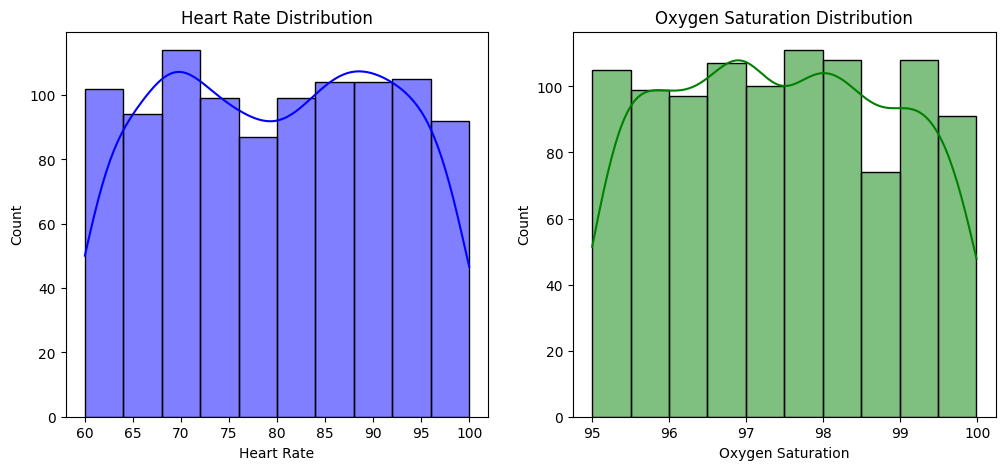

In [ ]:
# Visualizing Distributions
plt.figure(figsize=(12, 5))

# Histogram for Vizualize data
plt.subplot(1, 2, 1)
sns.histplot(health_condition["Heart Rate"], bins=10, kde=True, color='blue')
plt.title("Heart Rate Distribution")

plt.subplot(1, 2, 2)
sns.histplot(health_condition["Oxygen Saturation"], bins=10, kde=True, color='green')
plt.title("Oxygen Saturation Distribution")

### Detecting Outliers

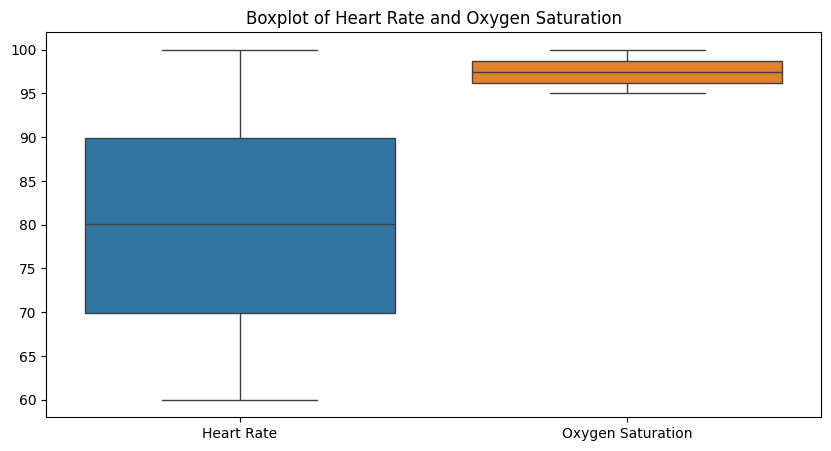

In [22]:
# Boxplots to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=health_condition[['Heart Rate', 'Oxygen Saturation']])
plt.title("Boxplot of Heart Rate and Oxygen Saturation")
plt.show()

### Correlation Matrix

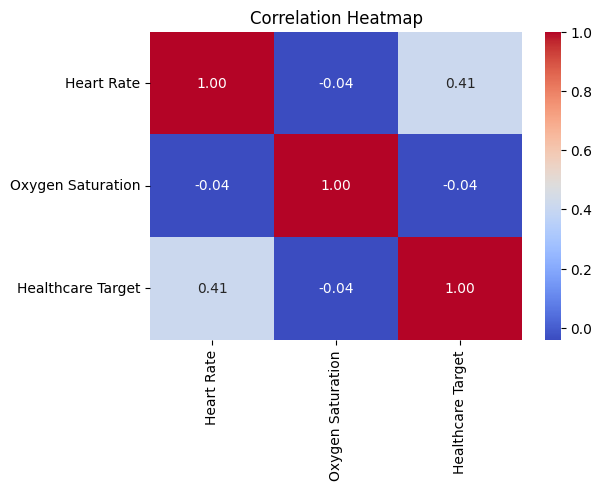

In [23]:
# Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(health_condition.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Scatter Plot

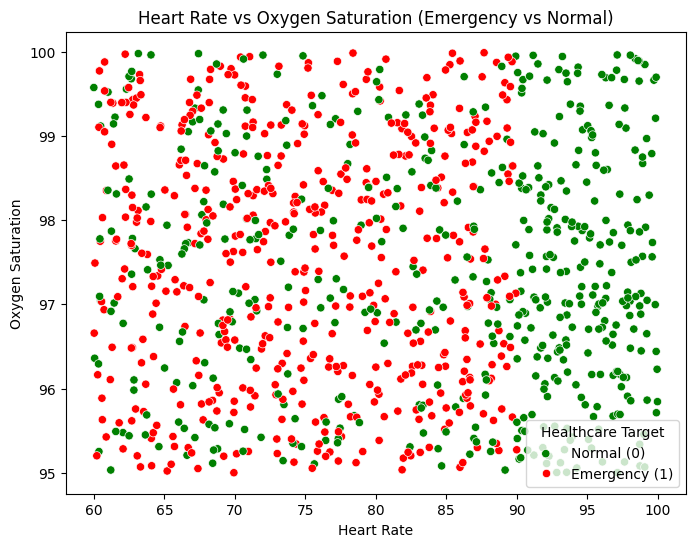

In [25]:
#Heart Rate vs Oxygen Saturation (Emergency vs Normal)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=health_condition["Heart Rate"], y=health_condition["Oxygen Saturation"], hue=health_condition["Healthcare Target"], palette={0: "red", 1: "green"})
plt.title("Heart Rate vs Oxygen Saturation (Emergency vs Normal)")
plt.xlabel("Heart Rate")
plt.ylabel("Oxygen Saturation")
plt.legend(title="Healthcare Target", labels=["Normal (0)", "Emergency (1)"])
plt.show()

##### These data are ready to feed into a ML model. As there aren't do much of pre-processing (no outliers, missing values)

In [26]:
# Saving the data to Analyzed file
health_condition.to_csv("Datasets/Analyzed/Analyzed_Health_Condition_Data.csv",index=False)